In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install missingno
import missingno as msno
%pip install fancyimpute
from fancyimpute import IterativeImputer, KNN


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [47]:
# Load the dataset
path = '/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv'

merged_data = pd.read_csv(path, na_values=('-','NaN','','nan'))
merged_data['KielerWoche']= merged_data['KielerWoche'].fillna(0)
merged_data['Schneehoehe']= merged_data['Schneehoehe'].fillna(0)

merged_data['Faehrverkaehr']=pd.to_numeric(merged_data['Faehrverkaehr'].str.replace('.', ''))
merged_data['Kreuzfahrverkehr']=merged_data['Kreuzfahrverkehr']*1000
df_merged_data = pd.DataFrame(merged_data)


print(df_merged_data.head())

        Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
0  2013-07-01            1.53        0.0              0.0    0.0   
1  2013-07-01            1.53        0.0              0.0    0.0   
2  2013-07-01            1.53        0.0              0.0    0.0   
3  2013-07-01            1.53        0.0              0.0    0.0   
4  2013-07-01            1.53        0.0              0.0    0.0   

   Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  \
0      1576718.0          419447.0     17.8375    7.0     Sommer  ...   
1      1576718.0          419447.0     17.8375    7.0     Sommer  ...   
2      1576718.0          419447.0     17.8375    7.0     Sommer  ...   
3      1576718.0          419447.0     17.8375    7.0     Sommer  ...   
4      1576718.0          419447.0     17.8375    7.0     Sommer  ...   

   Sonnenaufgang  Sonnenuntergang  Tageslaenge  Niederschlag  \
0        4:50:12         21:56:46     17:06:34           0.3   
1        4:50:12        

### Visualization of Missing Data

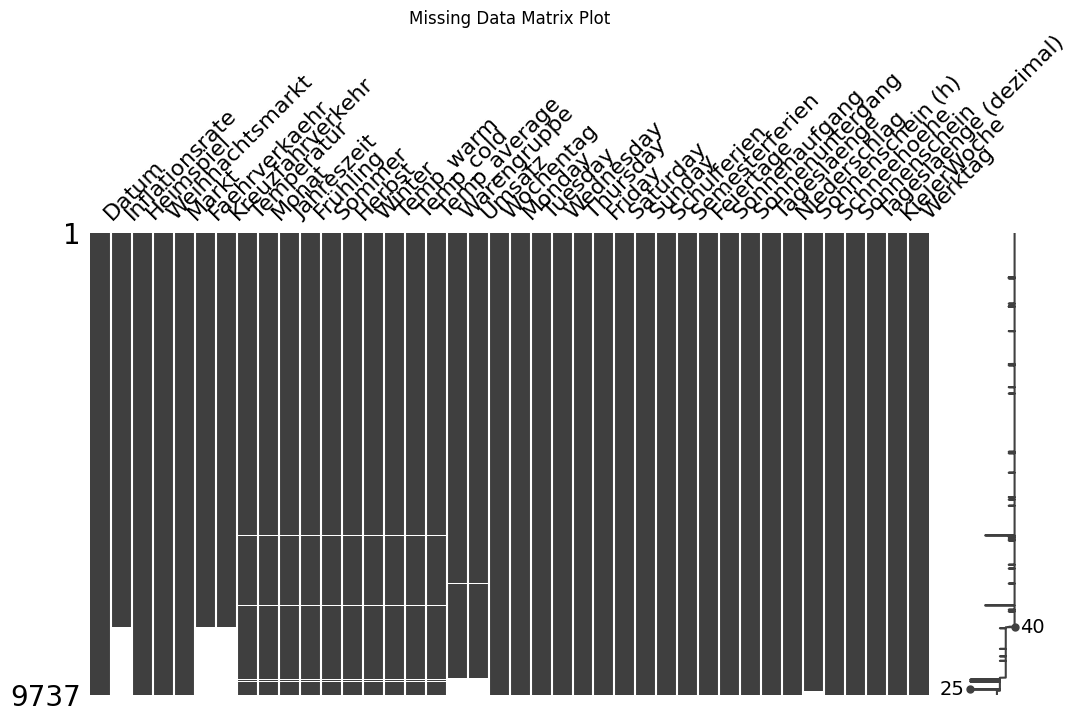

In [48]:
# Matrix plot of missing data
msno.matrix(df_merged_data, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

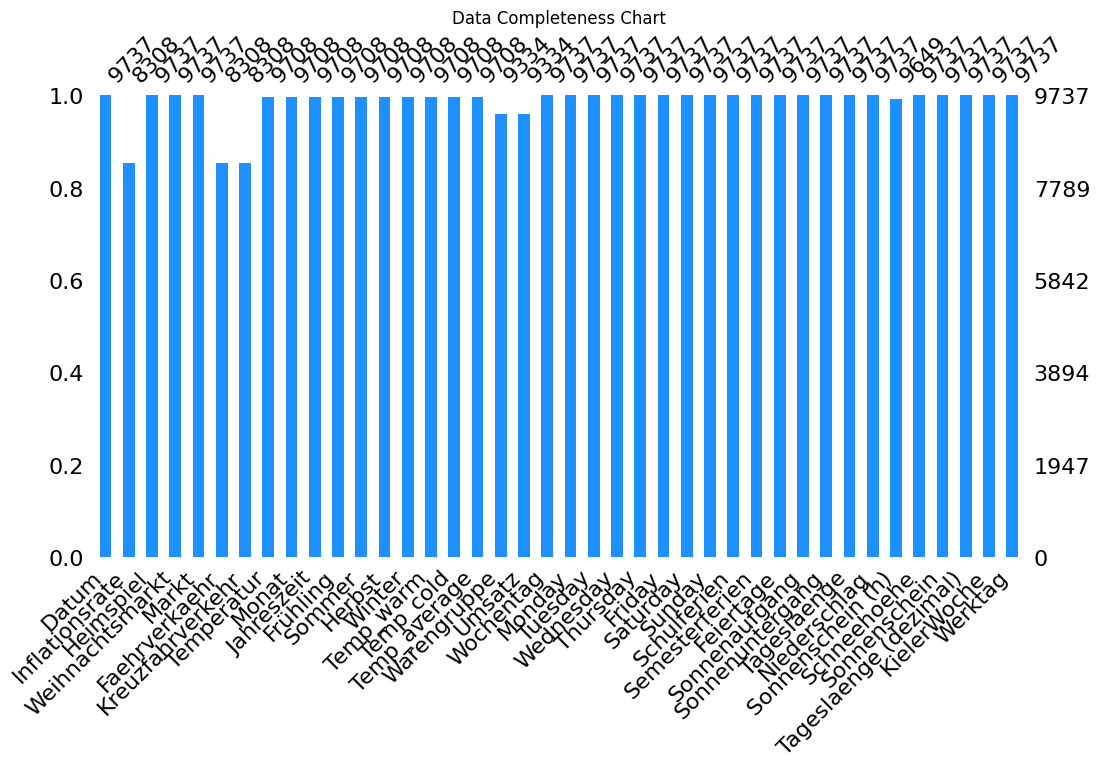

In [6]:
# Bar plot of complete data
msno.bar(df_merged_data, color="dodgerblue", figsize=(12, 6))
plt.title('Data Completeness Chart')
plt.show()

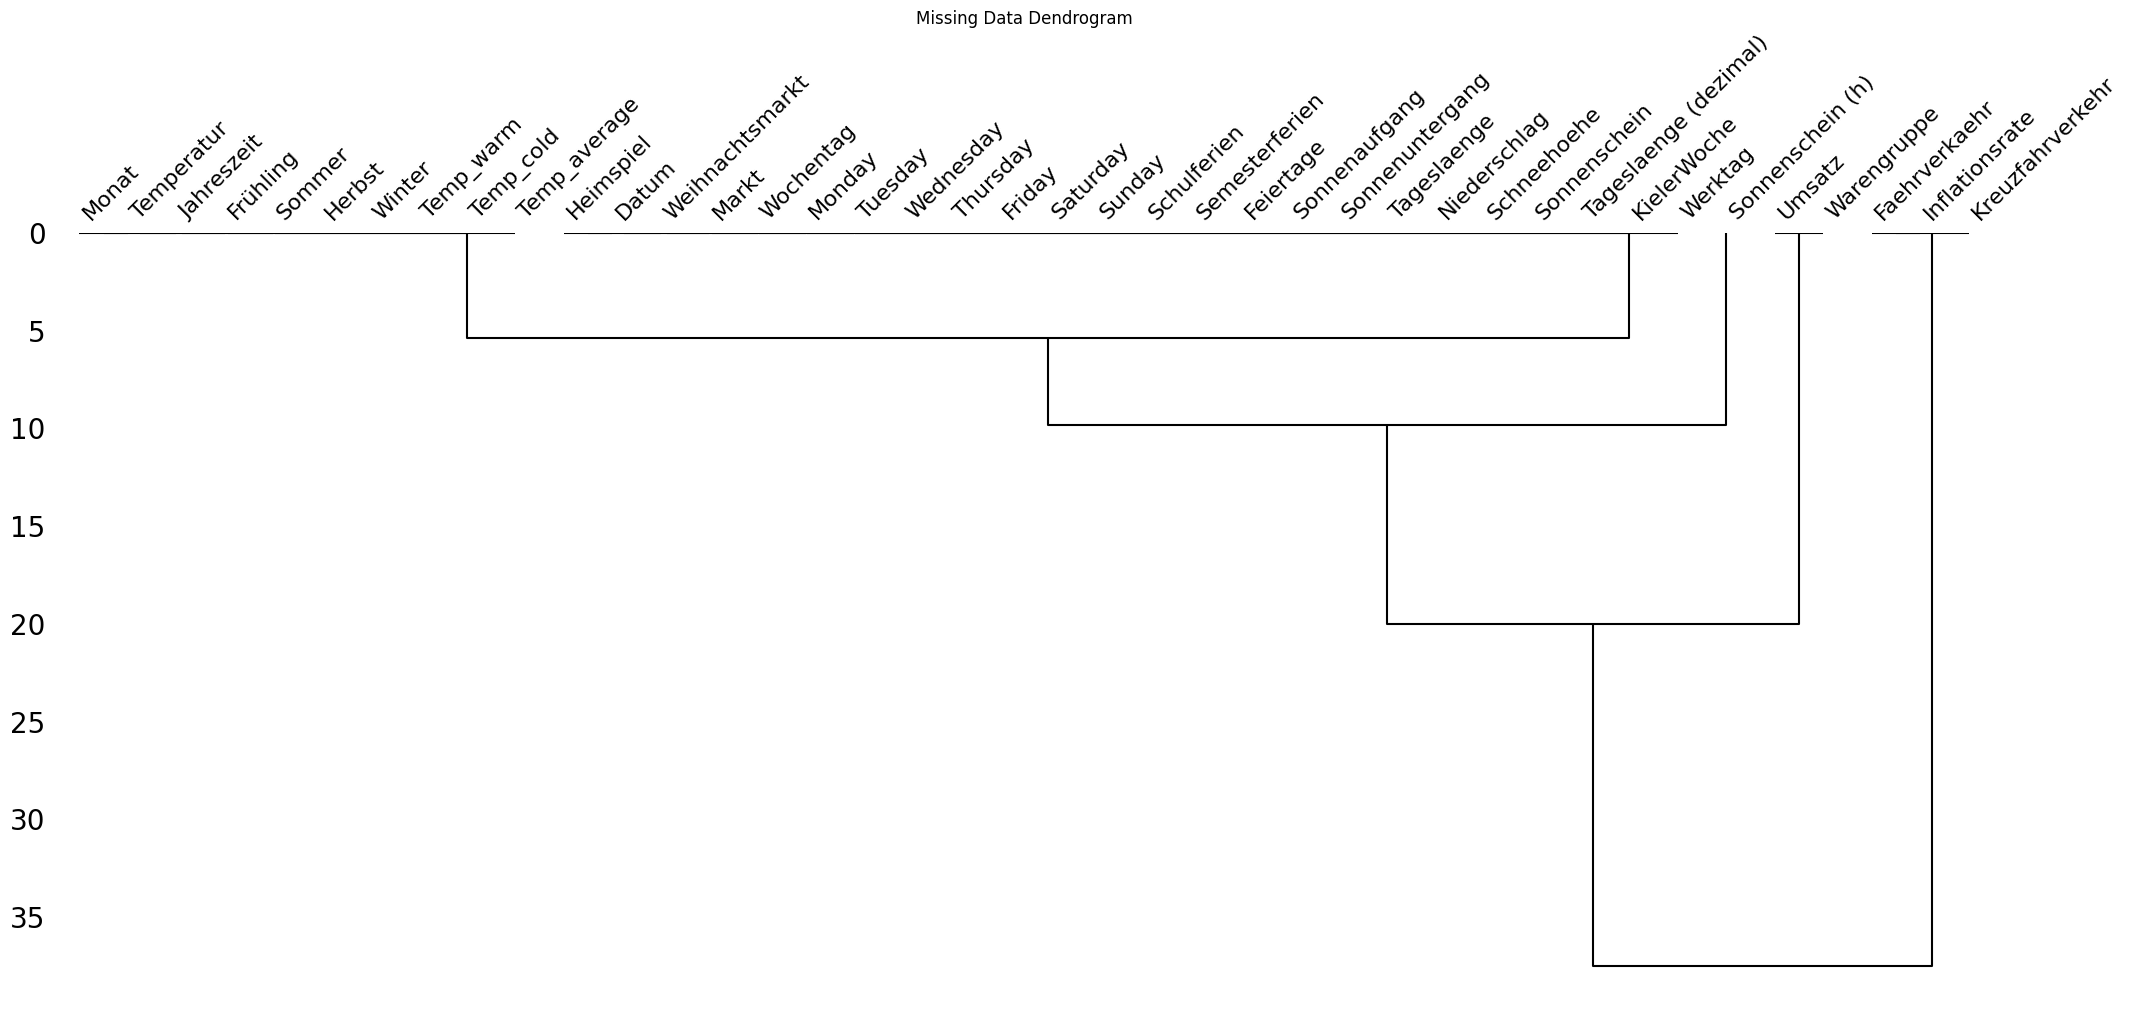

In [7]:

# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(df_merged_data)
plt.title('Missing Data Dendrogram')
plt.show()

### Imputation of Missing Data

In [8]:
# Create a mask for the imputed values
df_merged_data_reduced=df_merged_data.drop(['Datum','Kreuzfahrverkehr', 'Faehrverkaehr', 'Jahreszeit', 'Wochentag', 'Sonnenaufgang', 'Sonnenuntergang', 'Tageslaenge'], axis=1)

mask = df_merged_data_reduced.isna()  # mask for missing values in 'Ozone'

In [9]:
# KNN imputation
#'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt', 'Faehrverkaehr','Kreuzfahrverkehr','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','KielerWoche','Werktag'
imputer_knn = KNN()
airquality_knn = pd.DataFrame(imputer_knn.fit_transform(df_merged_data_reduced), columns=df_merged_data_reduced.columns)


Imputing row 1/9737 with 0 missing, elapsed time: 13.984
Imputing row 101/9737 with 0 missing, elapsed time: 13.984
Imputing row 201/9737 with 0 missing, elapsed time: 13.984
Imputing row 301/9737 with 0 missing, elapsed time: 13.984
Imputing row 401/9737 with 0 missing, elapsed time: 13.985
Imputing row 501/9737 with 0 missing, elapsed time: 13.985
Imputing row 601/9737 with 0 missing, elapsed time: 13.985
Imputing row 701/9737 with 0 missing, elapsed time: 13.985
Imputing row 801/9737 with 0 missing, elapsed time: 13.985
Imputing row 901/9737 with 0 missing, elapsed time: 13.986
Imputing row 1001/9737 with 0 missing, elapsed time: 13.986
Imputing row 1101/9737 with 0 missing, elapsed time: 13.986
Imputing row 1201/9737 with 0 missing, elapsed time: 13.987
Imputing row 1301/9737 with 0 missing, elapsed time: 13.987
Imputing row 1401/9737 with 0 missing, elapsed time: 13.987
Imputing row 1501/9737 with 0 missing, elapsed time: 13.987
Imputing row 1601/9737 with 0 missing, elapsed time:

In [8]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
airquality_irmi = pd.DataFrame(imputer_irmi.fit_transform(df_merged_data_reduced), columns=df_merged_data_reduced.columns)

### Visualization of Imputed Data

In [9]:
def plot_scatter_with_imputation(original_data, imputed_data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    
    # Overall min and max for both axes
    x_min = -20
    x_max = 100
    y_min = 50
    y_max = 100
    
    # Plot points
    sns.scatterplot(x=original_data.loc[~mask, x], y=original_data.loc[~mask, y], color='blue', label='Original')
    sns.scatterplot(x=imputed_data.loc[mask, x], y=imputed_data.loc[mask, y], color='red', label='Imputed')
    
    # Set consistent axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()


In [10]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(df_merged_data_reduced, airquality_knn, 'KielerWoche','Monday', mask, 'KNN Imputation Scatter Plot','KielerWoche','Monday')


ValueError: Cannot index with multidimensional key

<Figure size 1000x600 with 0 Axes>

In [23]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(airquality, airquality_irmi, 'Ozone', 'Temp', mask, 'IRMI Imputation Scatter Plot', 'Ozone', 'Temperature')

NameError: name 'airquality' is not defined

### Correlation Analysis

In [25]:
print("Correlation in original data:", df_merged_data_reduced['Niederschlag'].corr(df_merged_data_reduced['Temperatur'], method='pearson'))
print("Correlation after KNN imputation:", airquality_knn['Niederschlag'].corr(airquality_knn['Temperatur']))
print("Correlation after IRMI:", airquality_irmi['Niederschlag'].corr(airquality_irmi['Temperatur']))

Correlation in original data: -0.02291858263423717
Correlation after KNN imputation: -0.019489695394819644
Correlation after IRMI: -0.0228646479475805
